In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#Style setting
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (4,3)

In [24]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CHURN_DATASET/WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Section_A : Quick OverView

In [25]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [26]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


I can see below siniorCitizen Count = 7043,
1. Over 75% of customers are not senior citizens (iSeniorCitizen = 0)

2. Only about 16.2% are seniors, as seen from the mean((number of sinior citizen/total)100)

tenure - Total 7043 entries and
25%(Q1) customer are with company from less than 9 month
50%(Q2) OR Median =  customer are with company less than 29 mo
75%(Q3) = customer are with the company less than 55 mo

Monthly Charges(Amount that cstomer plays monthly) - Total - 7043
1. Among all 7043 customers, the average (mean) monthly bill is 64.76.

In [27]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


1. Total Changes is type of obj - having missing values 11
2. Ignore because missing values are very Less in Number
3. Fill it with zero

In [35]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [29]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


Section_B : Taget_Variable_Analysis

Churn 1900 something,
Non Churn 5000,
Highly Imbalence classes

At Evaluation Matrix -
Accuracy does not work

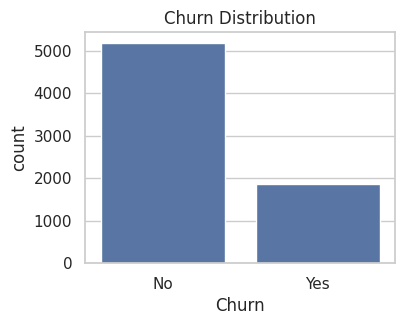

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [30]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Percentage churned
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)


No need of CustomerId

In [31]:
df = df.drop('customerID', axis = 1) ;
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Section_C : Saparation of Cato & Numer var of Analysis

Saprate numerical and categorical Values Create - bar for categorical For numeical - Box

In [36]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Section_D : EDA_
  1. Univariate_Analysis

    a. Univariate_catrgorical_col
    
    b. Univariate_numericals_col

Result_Univariate-

    Some classes are imablecne - linear model do not work

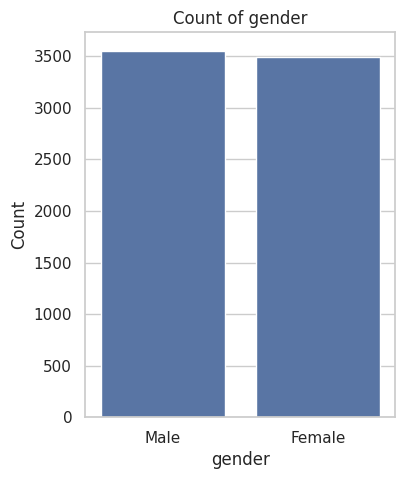

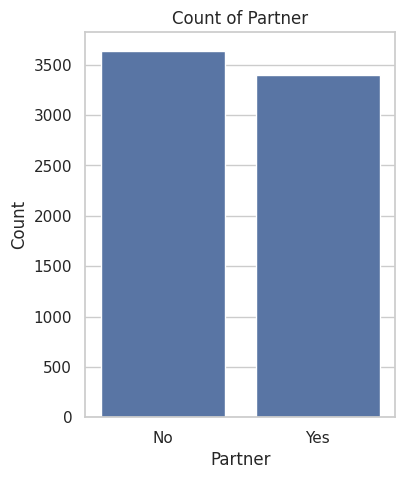

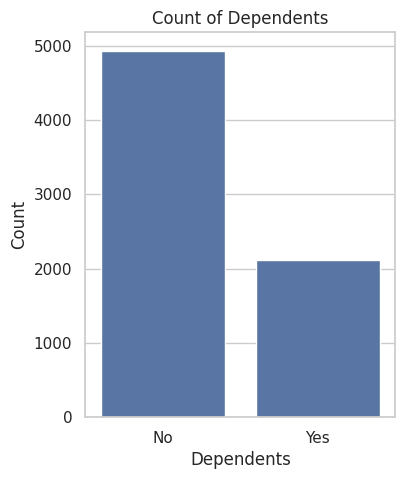

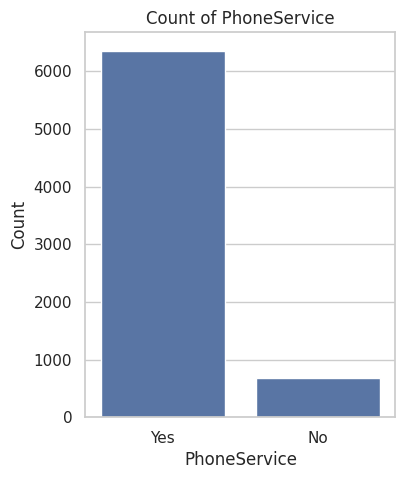

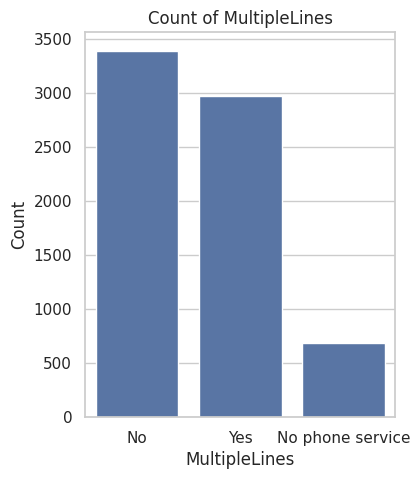

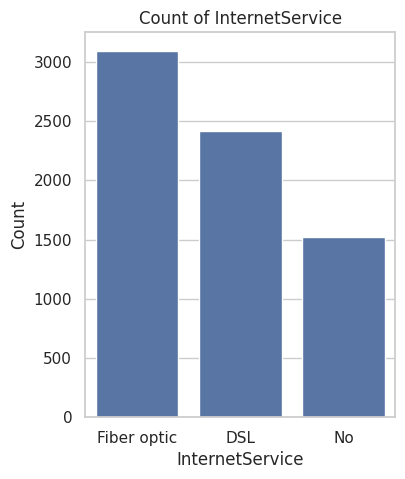

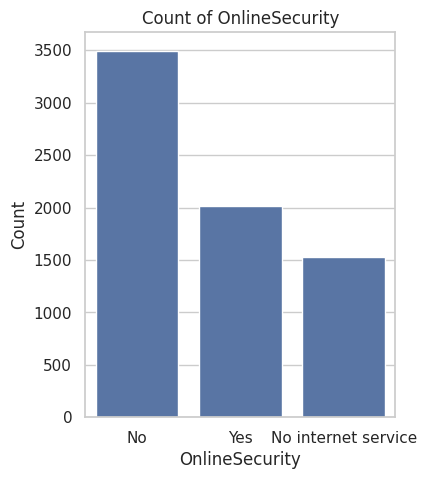

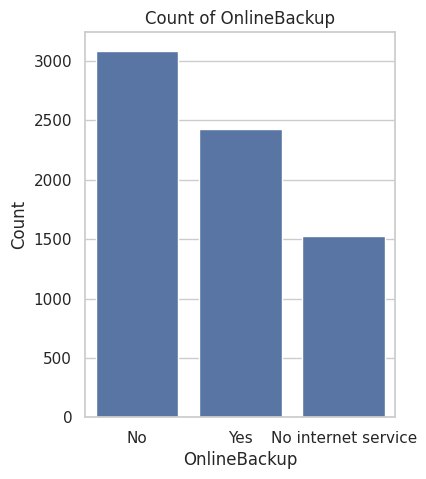

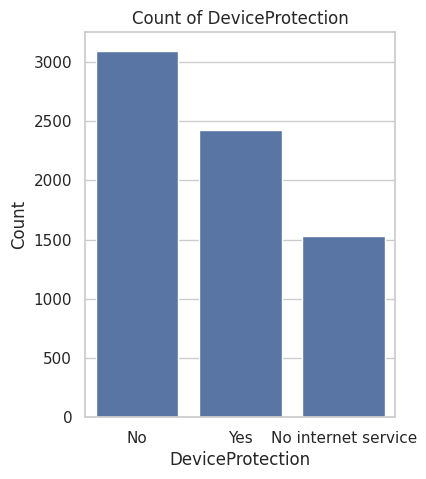

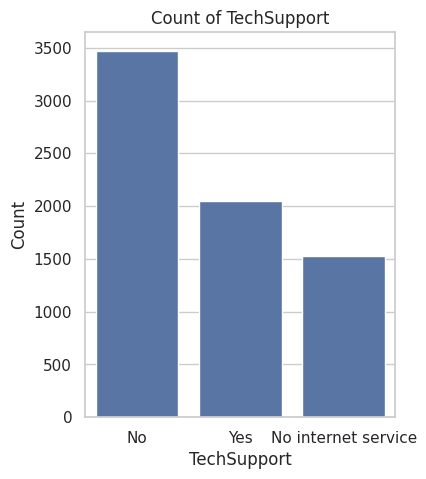

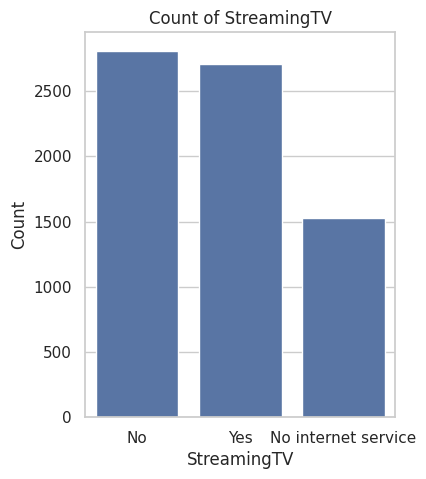

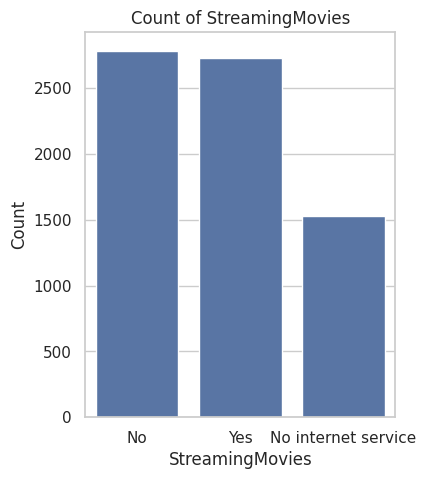

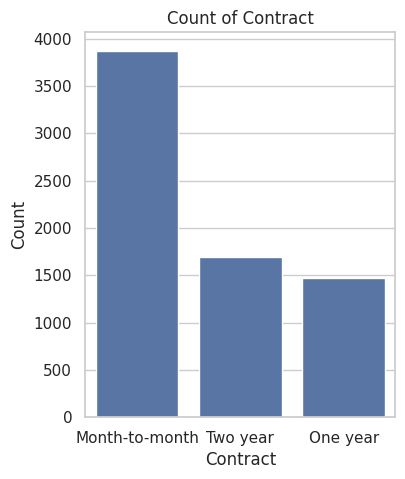

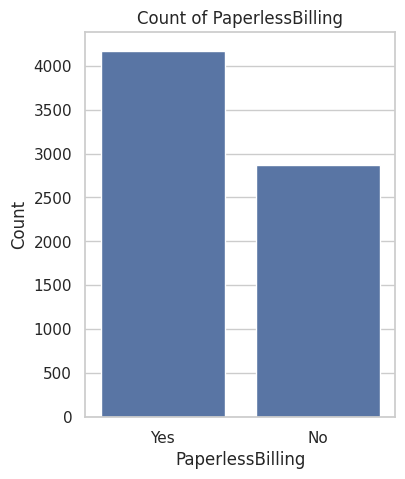

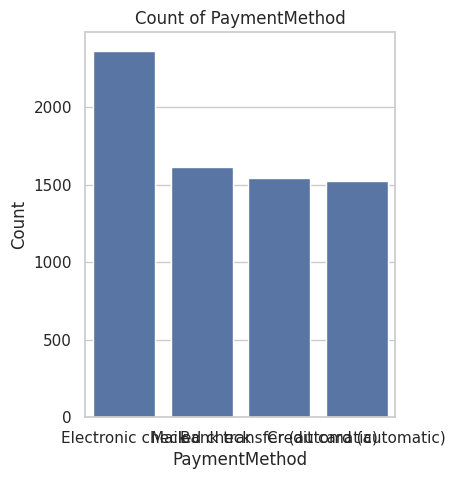

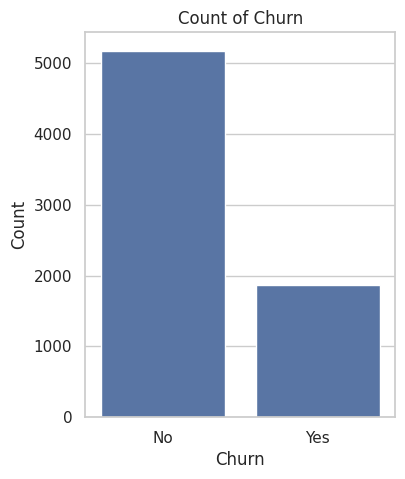

In [37]:
for col in categorical_cols:
    plt.figure(figsize=(4, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

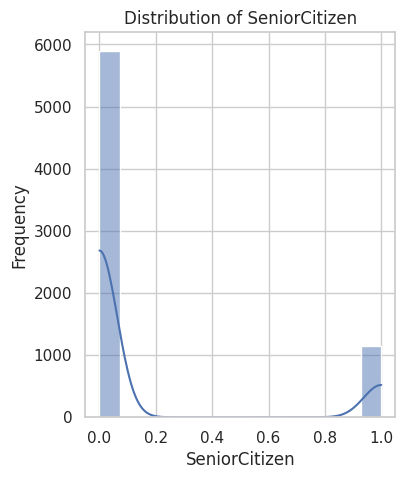

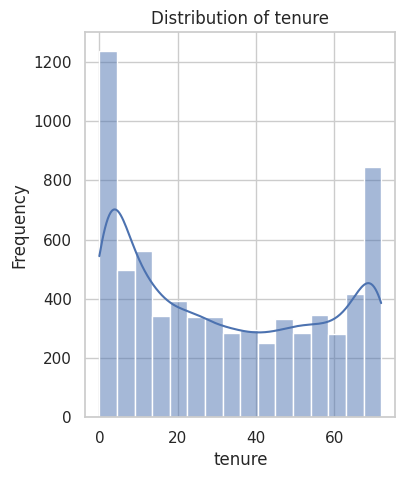

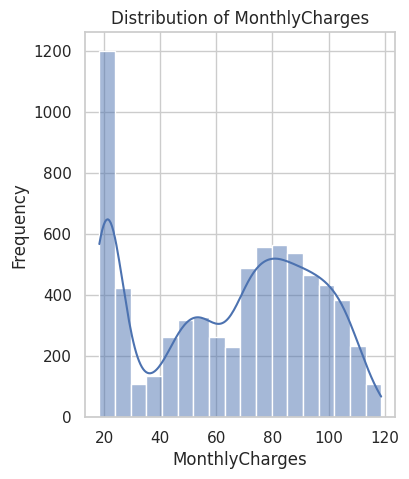

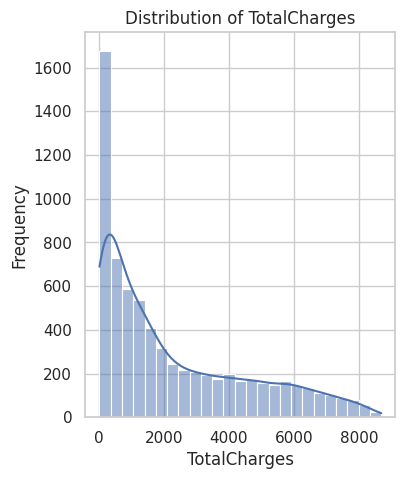

In [38]:
for col in numerical_cols:
    plt.figure(figsize=(4, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Section_D : EDA_
  1. Bivariate_Analysis

    a. Bivariate_catrgorical_col
    
    b. Bivariate_numericals_col

Result: Bivariate_catrgorical_col :
1. Gender -
          Male - 930+(930+2625) = 26%
          Female - 939/3488 = 26% ..............Almoat Equal

2. Partner
          Having - 19.66%     customer having partner is less churne
          No - 32.96  

3. Dependents -
          yes - 15% , no - 31.2% customer which are not dependent are hight churners

4. PhoneServices -
            Not So Much Insight

5. MultipleLines -
          Almoast equal no so much insight
6. InternetService -
              customer having Fiber Optices service are very high chuners -May be cost
              customer having no internet service are very less chuners

7. Online Security Services -
              customer with no security are very high churners
              customers with nointernet sevice+no online securtiy is very less churnes

8. OnLine BackUp -
              no online Backup are hight churner
9. Device Protection -
                Customer with no device protection are highly churners(May be cost sensitive)
10. Tech Support -
            No Tech Support hight chun
11. TV Steam Connection
                    Yes - less chun , no internet service - very less churn
12. Contract_Type
                Monthly - hight churn
                Yearly - less
                Two Yea - very less churn
13. PaperlessBillings -
                no paperless billing - hight chun
14. Payment Method -
                Credit - veryless
                Electonic - high churn
                Mail - less


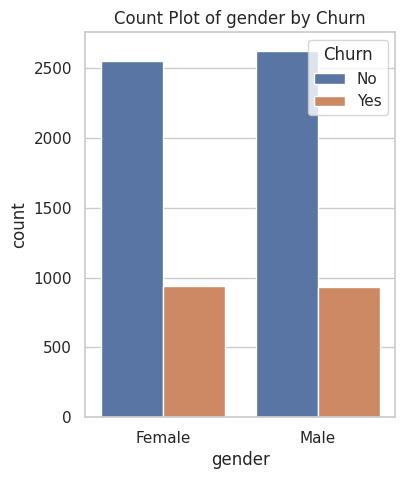

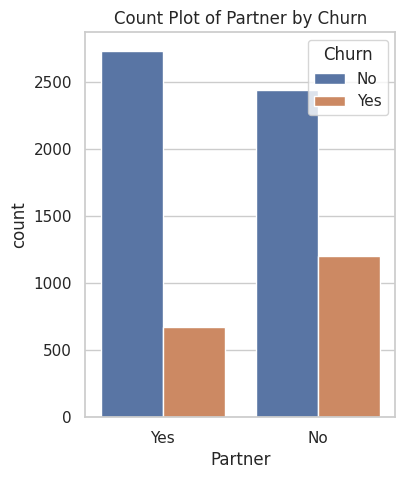

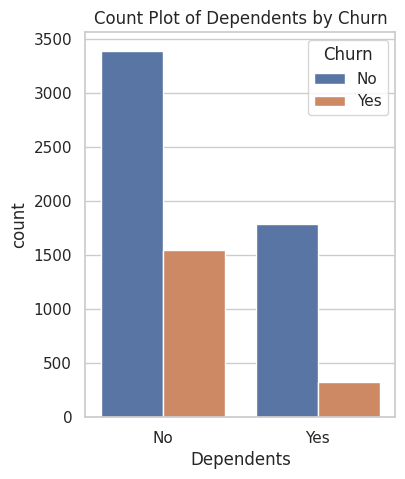

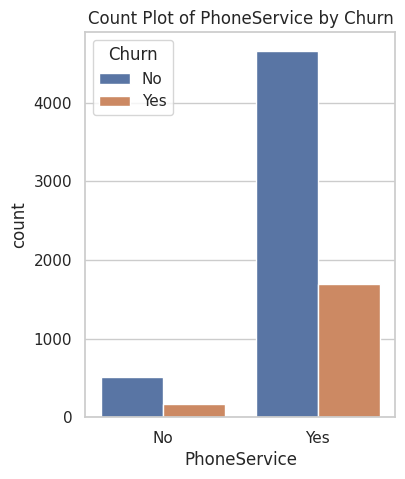

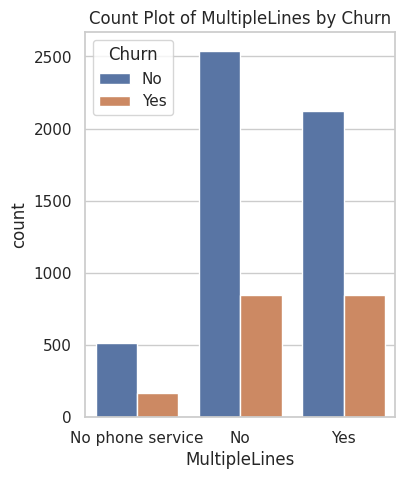

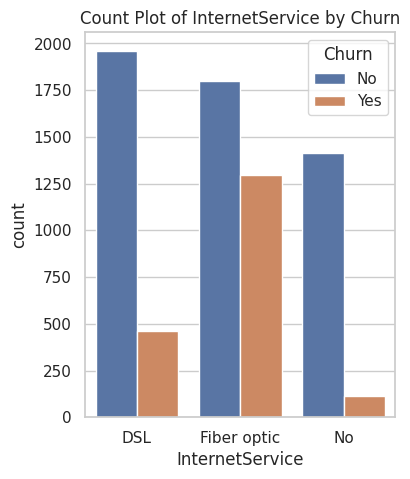

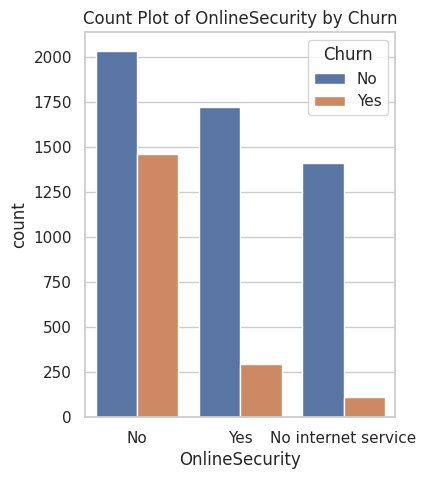

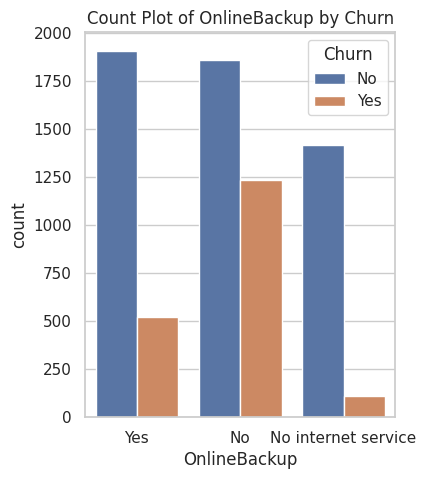

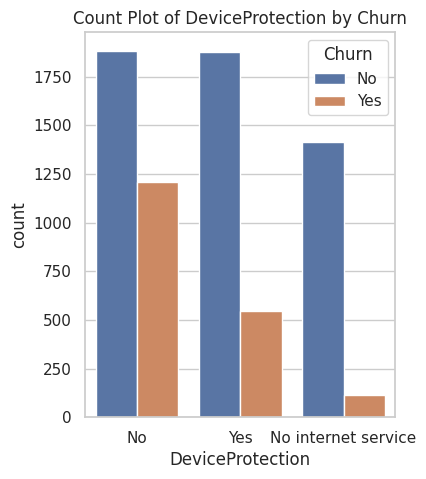

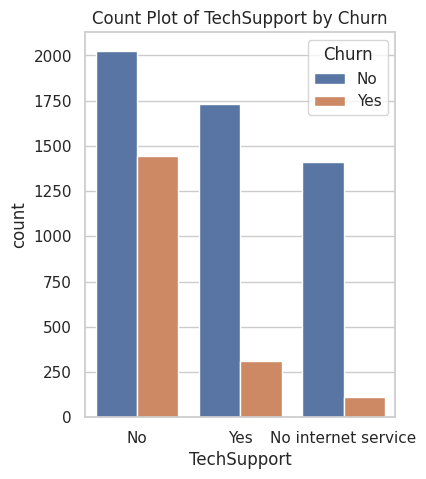

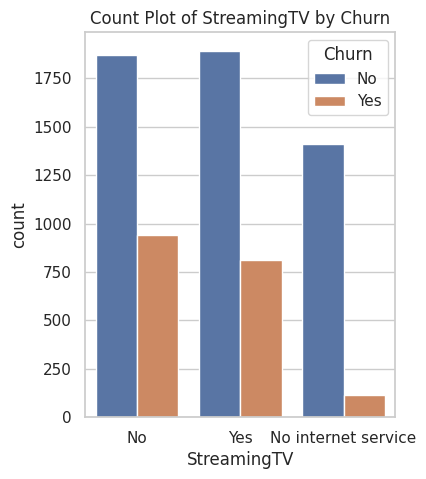

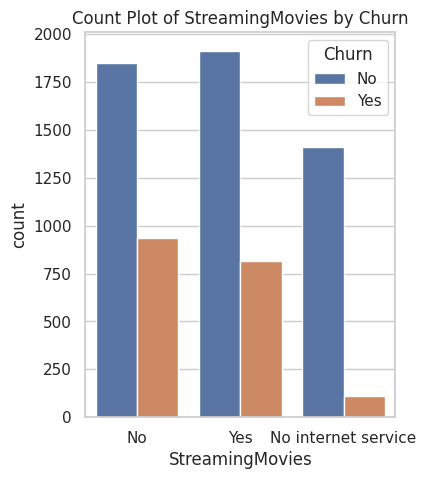

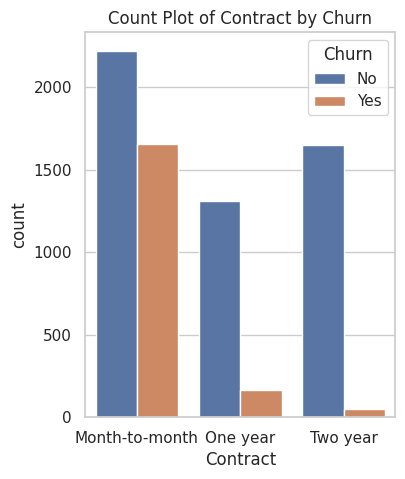

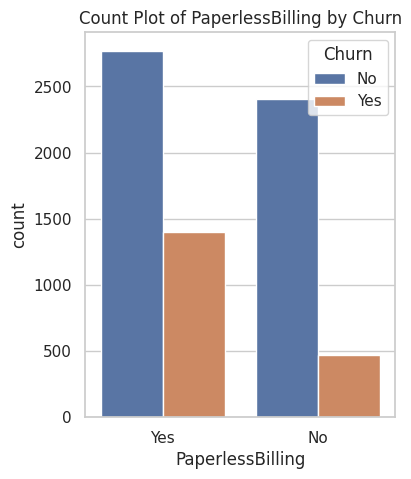

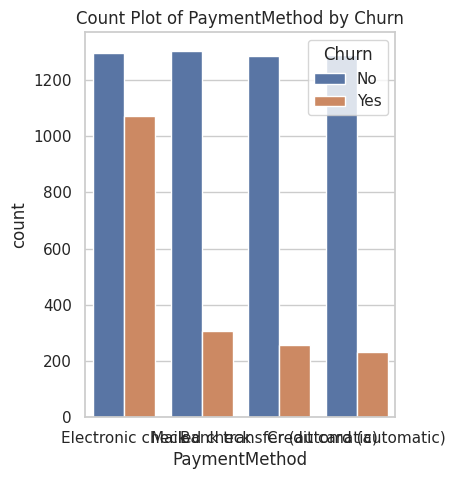

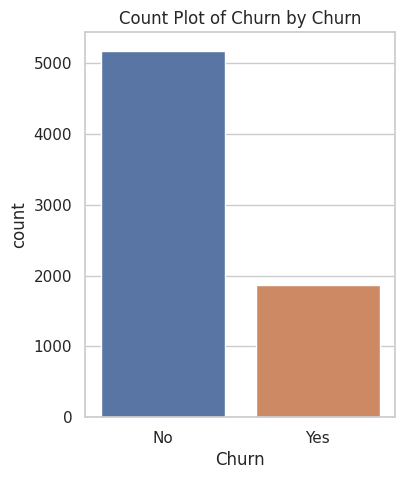

In [39]:
for col in categorical_cols:
    plt.figure(figsize=(4, 5))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Count Plot of {col} by Churn')
    plt.show()

Senior Citizen -
  For the "Yes" Churn Group:
  
    The wide box from 0 to 1 with the median line at 1 likely means that most, if not all, of the customers who churned were senior citizens (SeniorCitizen = 1).

  For the "No" Churn Group:

    The very thin line at 0 indicates that most non-churning customers were not senior citizens. There is an outlier at 1, which means there was at least one non-senior citizen who did not churn.

Tenure -
  Customers who did not churn (No):
  
    The box is wider and shifted to the right. This means the majority of non-churning customers have a higher tenure.
  
    The median tenure (the line in the middle of the box) is relatively high, likely around 40-45 months.

    The data is more spread out, indicating a wider range of tenures for this group.

  Customers who churned (Yes):

    The box is narrower and located on the left side of the plot. This indicates that most customers who churned had a very low tenure.

    The median tenure is very low, likely around 10 months.

There are a few outliers on the right, which represent a small number of long-term customers who also churned.

Monthly_Charges
  Customers who churned (Yes):

    The median MonthlyCharges for this group (the line inside the box) is significantly higher, appearing to be around 80-85.

    The box itself is also shifted to the right, showing that the middle 50% of churning customers had higher monthly bills.

  Customers who did not churn (No):

    The median MonthlyCharges for this group is lower, likely around 60.

    The box is wider and spans a lower range of values, indicating a more varied distribution of monthly charges among non-churning customers, with a significant number having lower bills.

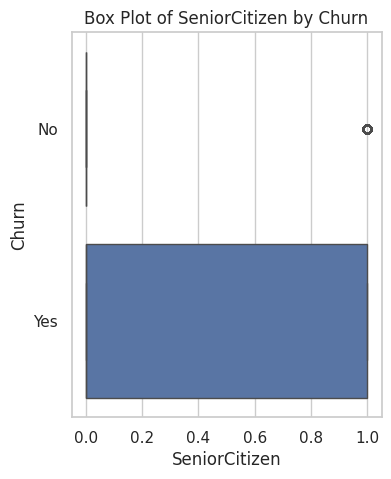

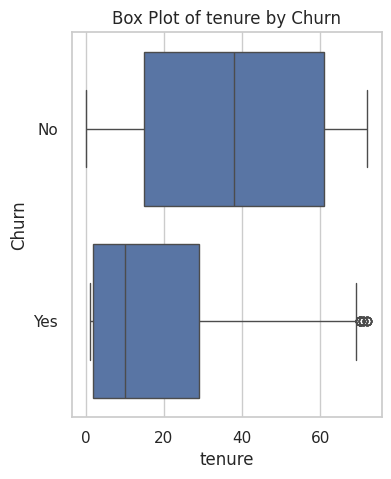

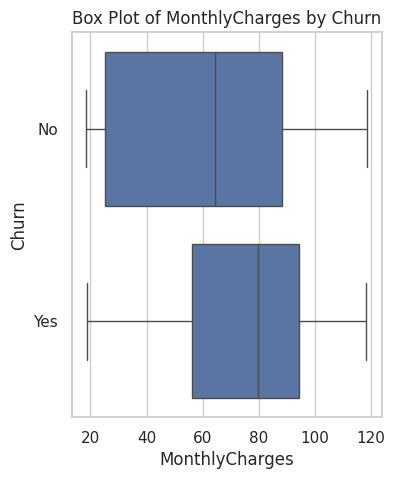

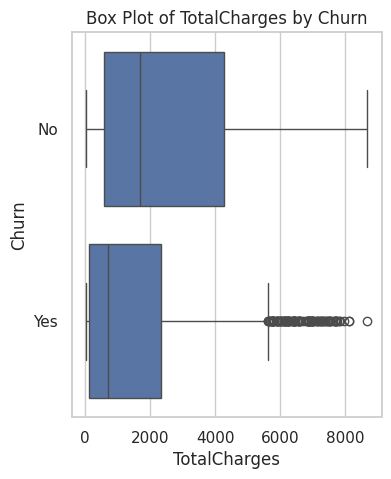

In [40]:
for col in numerical_cols:
    plt.figure(figsize=(4, 5))
    sns.boxplot(data=df, x=col, y='Churn')
    plt.title(f'Box Plot of {col} by Churn')
    plt.show()

Result_OF_EDA

    i have class Imbalence : have to do resampling
    i have missing value : only 11 can ignore
    All univaiate and Bivariate insight are written above
    have Both Numerical and categorical variables

Preprocessing_Steps_ based_ on _EDA

    1. OHE - for categorical
    2. Label_encoading - for target(ordinal catogrical)
    3. Have to handle Missing_values
    

Model_Judgement_based_on_EDA

    1. Inverse Relationship: Features like Partner, Dependents, and Contract Type show a clear inverse relationship with churn.

    2. The strong link between Payment Method (Electronic check) and Paperless Billing and high churn rates are strong signals. The model can use these features to identify a high-risk customer segment.

    3. The insights gathered are a perfect match for the strengths of tree-based models.

    4. beacuse these models work by creating rules based on the relationships.

    5. For example, a decision tree might create a rule like:

    "If Contract is 'Monthly', and InternetService is 'Fiber Optic', and OnlineSecurity is 'No', then the customer is highly likely to churn."

    6. We can't capture these complex, non-linear interactions with a simple correlation heatmap.
